<a href="https://colab.research.google.com/github/sassom2112/fuzzy-palm-tree/blob/master/Single_Neuron_Classifier_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()


Saving winequality-white.csv to winequality-white (2).csv
Saving winequality-red.csv to winequality-red (2).csv


In [3]:
# Load the datasets with the correct delimiter
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Add a 'wine_color' column (1 for red, 0 for white)
red_wine['wine_color'] = 1
white_wine['wine_color'] = 0

In [4]:
# Concatenate the two datasets into one
all_wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Shuffle the dataset to mix red and white wines
all_wine = all_wine.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features (X) and labels (y)
X = all_wine.drop(columns=['wine_color'])  # Features
y = all_wine['wine_color']  # Labels (1 for red, 0 for white)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better convergence during training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
loss_values = []

class SingleNeuronClassifier:
    def __init__(self, num_features):
        self.w = np.random.randn(num_features) * 0.01  # Initialize weights randomly
        self.w_0 = 0.0  # Initialize bias term

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Sigmoid activation function

    def predict(self, x):
        z = np.dot(x, self.w) + self.w_0  # Linear combination
        return self.sigmoid(z)  # Apply sigmoid to get prediction

    def train(self, X, y, epochs=100, learning_rate=0.01):
        for epoch in range(epochs):
            total_loss = 0
            for x_i, y_i in zip(X, y):
                y_pred = self.predict(x_i)

                # Binary cross-entropy loss (log loss)
                loss = -(y_i * np.log(y_pred + 1e-6) + (1 - y_i) * np.log(1 - y_pred + 1e-6))
                total_loss += loss

                # Gradient descent updates
                gradient_w_0 = y_pred - y_i  # Gradient for bias
                self.w_0 -= learning_rate * gradient_w_0  # Update bias term

                gradient_w = (y_pred - y_i) * x_i  # Gradient for weights
                self.w -= learning_rate * gradient_w  # Update weights

            # Store loss for each epoch
            loss_values.append(total_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {total_loss}")

    def classify(self, x):
        return 1 if self.predict(x) >= 0.5 else 0



Epoch 0, Loss: 551.9281190014063
Epoch 10, Loss: 184.04770761408875
Epoch 20, Loss: 172.51230903920484
Epoch 30, Loss: 167.3404907142106
Epoch 40, Loss: 164.3516669457824
Epoch 50, Loss: 162.44744990559607
Epoch 60, Loss: 161.16974909411826
Epoch 70, Loss: 160.2825365115792
Epoch 80, Loss: 159.65012187273132
Epoch 90, Loss: 159.18917947599925
Epoch 100, Loss: 158.846238760587
Epoch 110, Loss: 158.58592938786987
Epoch 120, Loss: 158.38436428369434
Epoch 130, Loss: 158.22518745907544
Epoch 140, Loss: 158.09709379978673
Epoch 150, Loss: 157.99220980143295
Epoch 160, Loss: 157.90500690162415
Epoch 170, Loss: 157.8315613515818
Epoch 180, Loss: 157.76904803340992
Epoch 190, Loss: 157.715395263395
Epoch 200, Loss: 157.66905077147723
Epoch 210, Loss: 157.6288239583317
Epoch 220, Loss: 157.59377990683555
Epoch 230, Loss: 157.563168100336
Epoch 240, Loss: 157.53637419080815
Epoch 250, Loss: 157.51288698224357
Epoch 260, Loss: 157.49227543900648
Epoch 270, Loss: 157.47417232207826
Epoch 280, Loss

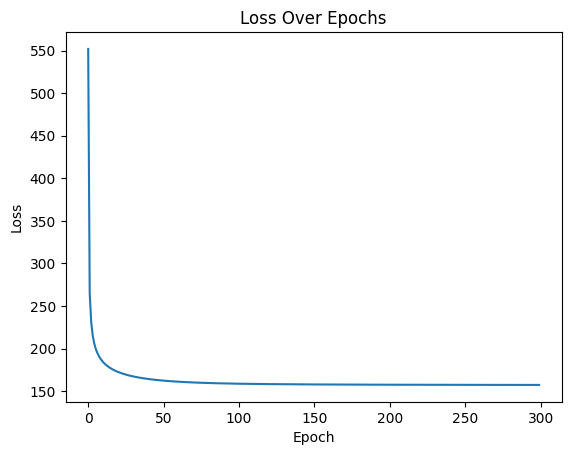

In [6]:
# Train the model
num_features = X_train.shape[1]
single_neuron_classifier = SingleNeuronClassifier(num_features)
single_neuron_classifier.train(X_train, y_train, epochs=300, learning_rate=0.01)

# Evaluate the model on the test set
correct = 0
for x_i, y_i in zip(X_test, y_test):
    prediction = single_neuron_classifier.classify(x_i)
    if prediction == y_i:
        correct += 1

accuracy = correct / len(y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# After training, plot the loss values
plt.plot(loss_values)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()